# I am testing the data I scraped from the web with the best (final) model for the data set downloaded from Kaggle

In [1]:
import pandas as pd
import numpy as np
import keras
from keras import layers
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout, BatchNormalization
import tensorflow as tf
from tensorflow.keras.utils import image_dataset_from_directory
from google.colab import drive, files
from sklearn.metrics import confusion_matrix, recall_score, precision_score, f1_score
import matplotlib.pyplot as plt
from tensorflow.keras.models import Model
import seaborn as sns
from PIL import Image
sns.set_style()
%matplotlib inline

In [4]:
# Making data set from images that are in folders named as their class_label
column_labels = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men',
                 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'sherwanis', 'saree', 'women_kurta']
test_dataset = image_dataset_from_directory(
    '/content/new_test_images',
    labels='inferred',
    color_mode='grayscale',
    batch_size=128,
    image_size=(70,70),
    shuffle=False,
    seed=None,
    validation_split=None,
    crop_to_aspect_ratio=False,
    class_names=column_labels)

Found 7500 files belonging to 15 classes.


In [5]:
# Normalizing images
normalization_layer = layers.Rescaling(1./255)
test_ds_norm = test_dataset.map(lambda x, y: (normalization_layer(x), y))

In [6]:
# Setting up model
img_width, img_height = 70, 70
epochs = 2000
batch_size = 128
n_classes = 15
input_shape= (img_width, img_height, 1)

In [7]:
# Keras model
model = Sequential()
model.add(Conv2D(32, (3,3), activation='relu', input_shape=input_shape))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(32, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.2))

model.add(Conv2D(64, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.3))

model.add(Conv2D(128, (3,3), activation='relu'))
model.add(layers.BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Dropout(0.4))

model.add(Flatten())

model.add(Dense(140, activation='relu'))

model.add(Dropout(0.5))

model.add(Dense(n_classes, activation='softmax'))

model.compile(loss='SparseCategoricalCrossentropy', optimizer='adam', metrics=['accuracy'])

In [8]:
# Loading the best weights for this model
model.load_weights('/content/drive/MyDrive/keras/final_model.keras')

In [9]:
loss, acc = model.evaluate(test_ds_norm, y=None, verbose=2)

59/59 - 36s - loss: 1.3969 - accuracy: 0.6372 - 36s/epoch - 606ms/step


## The original test data had 84.68% accuracy and this data has 63.72%. A retrained model is needed to make better predictions for this data.

In [10]:
# Un-doing the normalization in order to visualize the images
test_dataset = test_ds_norm.map(lambda x, y: (255*x, y))

In [11]:
# Getting the images (x_test) and true categories (y_true) from test data set
y_true = []
x_test = []
for x, y in test_dataset:
    y = y.numpy()
    y_true.append(y)
    x_test.append(x)

In [12]:
# Unpacking nested list into 1-D list
y_true = [item for sublist in y_true for item in sublist]

In [14]:
# Unpacking nested list into 1-D list
x_test = [item for sublist in x_test for item in sublist]

In [16]:
# Predicting labels from model
y_pred = model.predict(
    test_ds_norm,
    batch_size=None,
    verbose="auto",
    )

59/59 [==============================] - 44s 726ms/step


In [17]:
# Since softmax gives probabilities of labels being correct, to get the most likely label,
# must take maximum probability for each label
y_pred = y_pred.argmax(axis=1)

In [19]:
# Making a dictionary to take the numerical output and translate it to the class label
label_dict = {0:'blouse', 1:'dhoti_pants', 2:'dupattas', 3:'gowns', 4:'kurta_men', 5:'leggings_and_salwars', 6:'lehenga',
          7:'mojaris_men', 8:'mojaris_women', 9:'nehru_jackets', 10:'palazzos', 11:'petticoats', 12:'sherwanis', 13: 'saree',
           14:'women_kurta'}

In [20]:
# Squeezing the np array so that its shape is (70, 70) instead of (70, 70, 1), which is required for Image.fromarray
def tensor_to_image(tensor):
    tensor = np.array(tensor, dtype=np.uint8)
    tensor = np.squeeze(tensor, axis=2)
    return Image.fromarray(tensor)

## Showing some images and their true and predicted labels.

True label: blouse
Predicted label: blouse


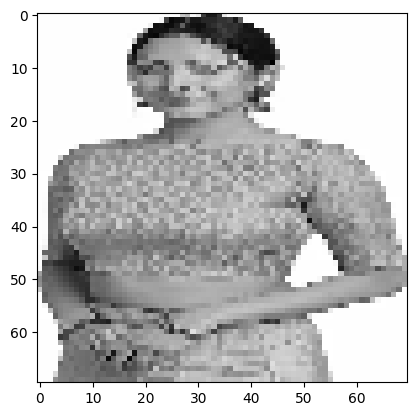

In [21]:
img = tensor_to_image(x_test[0])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[0]]}')
print(f'Predicted label: {label_dict[y_pred[0]]}')

True label: dhoti_pants
Predicted label: sherwanis


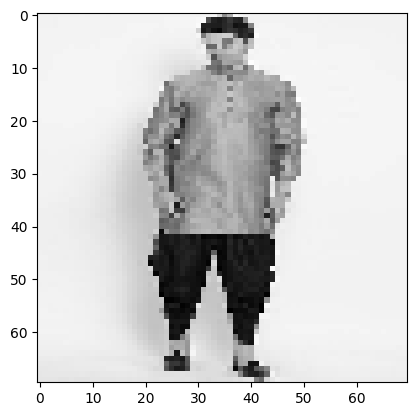

In [22]:
img = tensor_to_image(x_test[550])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[550]]}')
print(f'Predicted label: {label_dict[y_pred[550]]}')

## The man above is wearing a sherwani and dhoti pants

True label: kurta_men
Predicted label: sherwanis


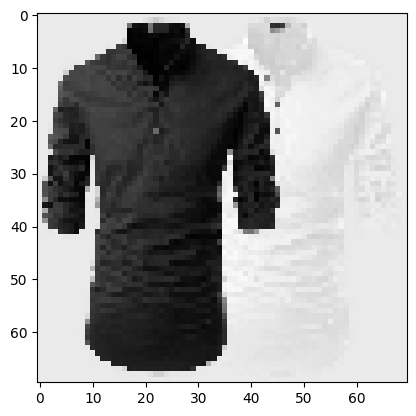

In [23]:
img = tensor_to_image(x_test[2000])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[2000]]}')
print(f'Predicted label: {label_dict[y_pred[2000]]}')

True label: lehenga
Predicted label: lehenga


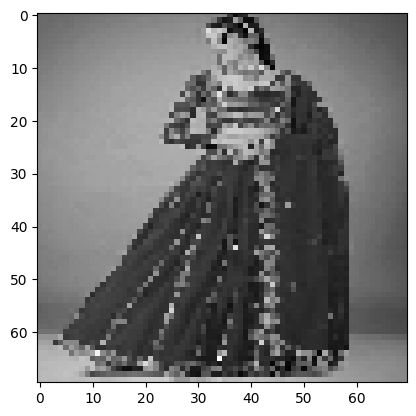

In [24]:
img = tensor_to_image(x_test[3000])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[3000]]}')
print(f'Predicted label: {label_dict[y_pred[3000]]}')

True label: mojaris_women
Predicted label: mojaris_women


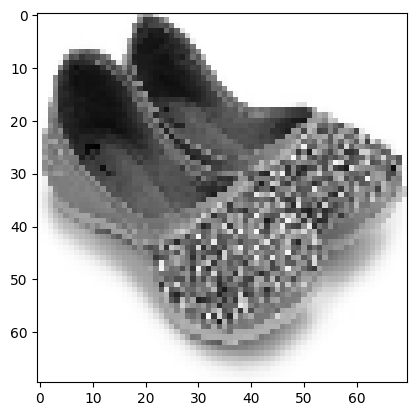

In [27]:
img = tensor_to_image(x_test[4000])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[4000]]}')
print(f'Predicted label: {label_dict[y_pred[4000]]}')

True label: saree
Predicted label: lehenga


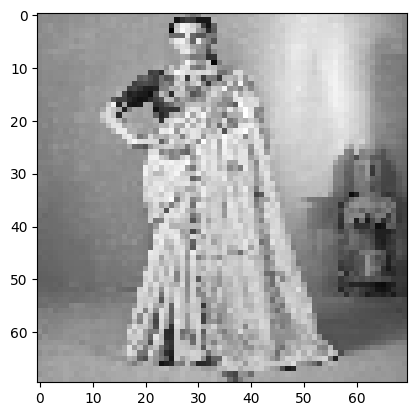

In [28]:
img = tensor_to_image(x_test[6400])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[6400]]}')
print(f'Predicted label: {label_dict[y_pred[6400]]}')

True label: sherwanis
Predicted label: sherwanis


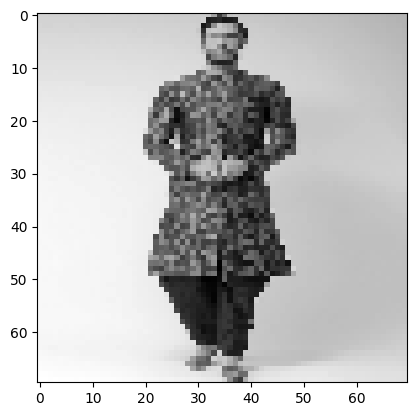

In [29]:
img = tensor_to_image(x_test[6600])
plt.imshow(img, cmap='gray')
print(f'True label: {label_dict[y_true[6600]]}')
print(f'Predicted label: {label_dict[y_pred[6600]]}')

In [18]:
# Calculating metrics
ps = precision_score(y_true, y_pred, average='macro')*100
rs = recall_score(y_true, y_pred, average='macro')*100
f1 = f1_score(y_true, y_pred, average='macro')*100
print(f'Precision: {ps:.2f}')
print(f'Recall: {rs:.2f}')
print(f'F1 Score: {f1:.2f}')

Precision: 68.22
Recall: 63.72
F1 Score: 63.48


In [31]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)

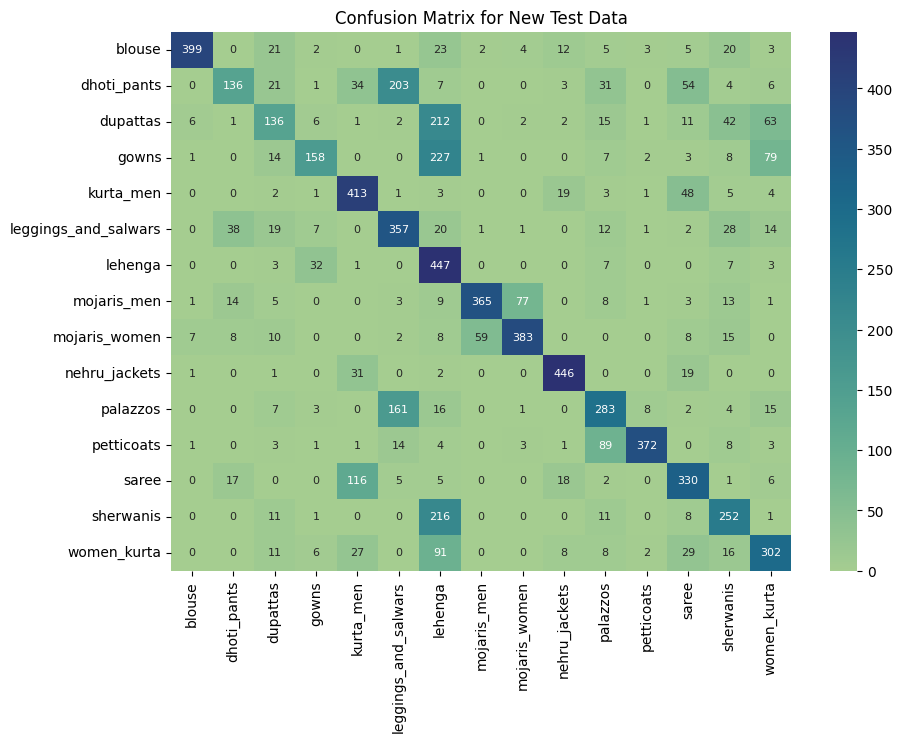

In [32]:
# Plotting confusion matrix as heat map so that it is easier to read
df_cm = pd.DataFrame(cm, index = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats', 'saree', 'sherwanis', 'women_kurta'],
                  columns = ['blouse', 'dhoti_pants', 'dupattas', 'gowns', 'kurta_men', 'leggings_and_salwars', 'lehenga', 'mojaris_men', 'mojaris_women', 'nehru_jackets', 'palazzos', 'petticoats',  'saree', 'sherwanis','women_kurta'])
plt.figure(figsize = (10,7))
sns.heatmap(df_cm, annot=True, annot_kws={"size":8}, fmt='d', cmap='crest')
_ = plt.title('Confusion Matrix for New Test Data')